HEART DISEASE PREDICTION

IMPORTING LIBRARIES

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pickle

C:\Users\HP\AppData\Local\Temp\ipykernel_20524\1136167889.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


DATASET LOADING

In [3]:

df = pd.read_excel(r"Ch3.ClevelandData.xlsx")


TOP 10 RECORDS OF DATASET

In [4]:

df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hal,HeartDisease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2,3,1
7,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1,7,1
9,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hal,HeartDisease
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
302,38,1,3,138,175,0,0,173,0,0.0,1,?,3,0


SHAPE OF THE DATASET

In [6]:

print("Numbers of Rows :" ,df.shape[0])
print("Numbers of Columns :" ,df.shape[1])

Numbers of Rows : 303
Numbers of Columns : 14


FEATURES

In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'hal', 'HeartDisease'],
      dtype='object')

RENAMING THE FEATURE NAME 

In [8]:
new_col={"hal":"thal"}

df.rename(columns=new_col,inplace=True)

DATATYPES OF FEATURE COLUMNS

In [9]:
df.dtypes

age               int64
sex               int64
cp                int64
trestbps          int64
chol              int64
fbs               int64
restecg           int64
thalach           int64
exang             int64
oldpeak         float64
slope             int64
ca               object
thal             object
HeartDisease      int64
dtype: object

INFORMATION OF DATASET

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           303 non-null    int64  
 1   sex           303 non-null    int64  
 2   cp            303 non-null    int64  
 3   trestbps      303 non-null    int64  
 4   chol          303 non-null    int64  
 5   fbs           303 non-null    int64  
 6   restecg       303 non-null    int64  
 7   thalach       303 non-null    int64  
 8   exang         303 non-null    int64  
 9   oldpeak       303 non-null    float64
 10  slope         303 non-null    int64  
 11  ca            303 non-null    object 
 12  thal          303 non-null    object 
 13  HeartDisease  303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


CHECKING NULL VALUES PERCENTAGE IN DATASET

In [11]:
df.isnull().sum()/len(df)*100

age             0.0
sex             0.0
cp              0.0
trestbps        0.0
chol            0.0
fbs             0.0
restecg         0.0
thalach         0.0
exang           0.0
oldpeak         0.0
slope           0.0
ca              0.0
thal            0.0
HeartDisease    0.0
dtype: float64

CHECKING  DUPLICATED VALUES 

In [12]:
df.duplicated().sum()

0

THERE IS 2 FEATURES WHICH HAVE DATATYPE "OBJECT".SO WE NEED TO CHANGE THAT INTO FLOAT OR INT...

In [13]:
df['ca']= df['ca'].replace("?",np.NaN)
df['thal']= df['thal'].replace("?",np.NaN)

WE CHECK THE VALUE COUNTS OF BOTH THE COLUMNS

In [14]:
df['ca'].value_counts()

ca
0.0    176
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64

In [15]:
df['thal'].value_counts()

thal
3.0    166
7.0    117
6.0     18
Name: count, dtype: int64

REPLACED THE NaN VALUES WITH MODE (MOST OCCURING VALUE IN THAT COLUMN) AND THEN CHANGED THE DATATYPE

In [16]:

# Replace NaN with 0 in the 'ca' column
df['ca'] = df['ca'].fillna(0)
# Replace NaN with 0 in the 'ca' column
df['thal'] = df['thal'].fillna(3)
# Convert the 'ca' column to np.float64
df['ca'] = df['ca'].astype(np.float64)
# Convert the 'ca' column to np.float64
df['thal'] = df['thal'].astype(np.float64)

In [17]:
df.isnull().sum()

age             0
sex             0
cp              0
trestbps        0
chol            0
fbs             0
restecg         0
thalach         0
exang           0
oldpeak         0
slope           0
ca              0
thal            0
HeartDisease    0
dtype: int64

DESCRIPTIVE ANALYSIS


In [18]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,HeartDisease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [19]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,HeartDisease
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.365323,0.128303,0.223120
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.086048,0.380581,0.276816
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233117,0.262089,0.414446
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.097528,0.134424,0.150825
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.123726,0.018351,0.085164
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.140764,0.064625,0.025264
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.131749,0.024325,0.169202
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.265699,-0.274142,-0.417167
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145788,0.325240,0.431894
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.301067,0.342405,0.424510


CORREALATION USING HEATMAP

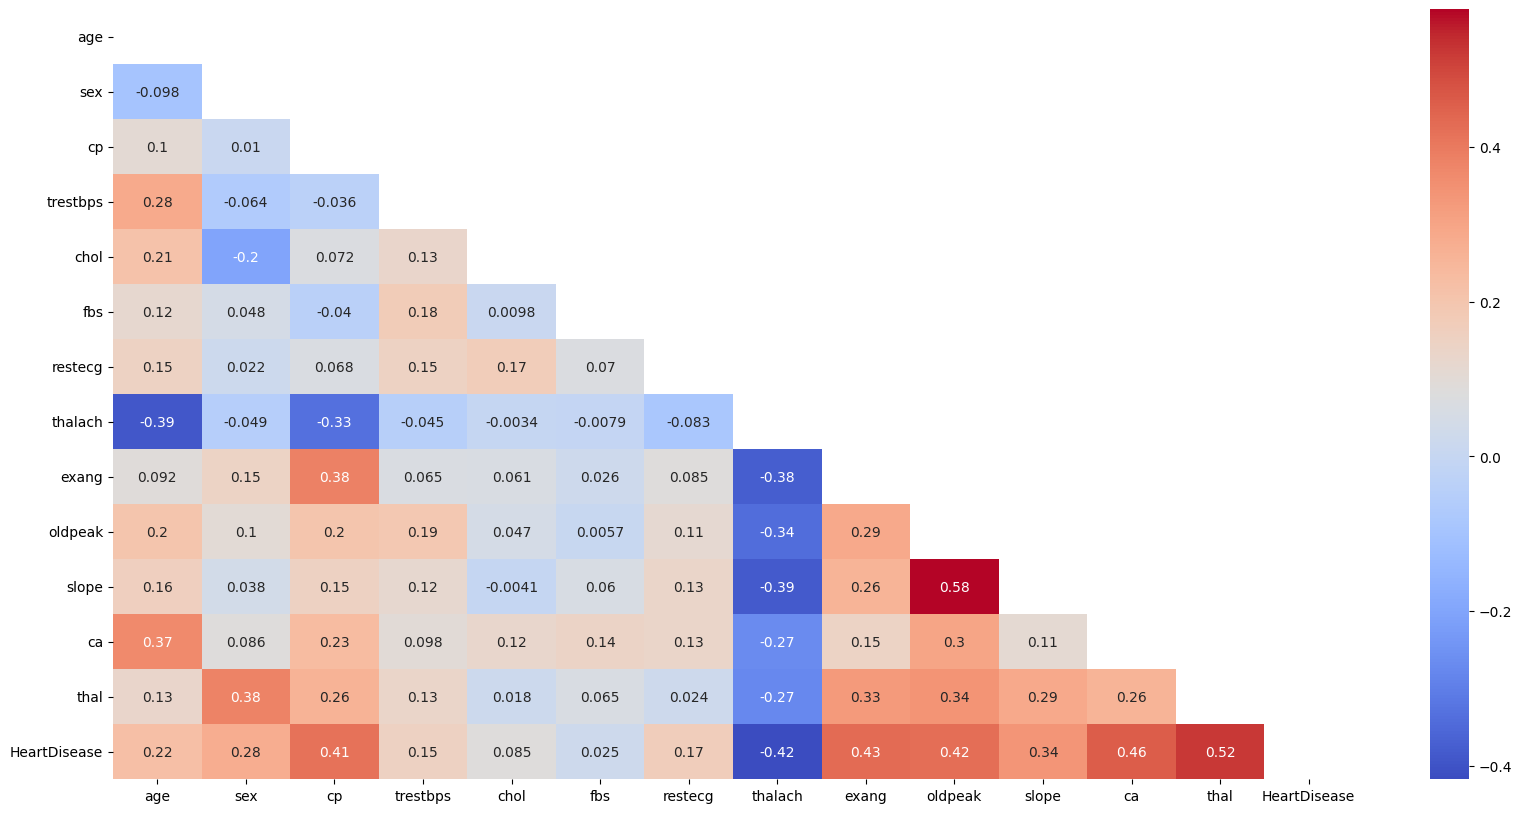

In [20]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, mask=mask, cmap='coolwarm')
plt.show()


EXPLORATORY DATA ANALYSIS

1) UNIVARIATE ANALYSIS

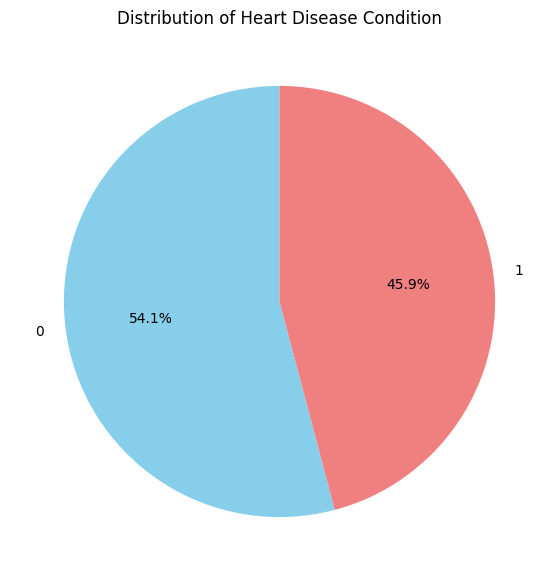

In [21]:

condition_counts = df['HeartDisease'].value_counts()

plt.figure(figsize=(15,7))
plt.pie(condition_counts, labels=condition_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Heart Disease Condition')
plt.show()

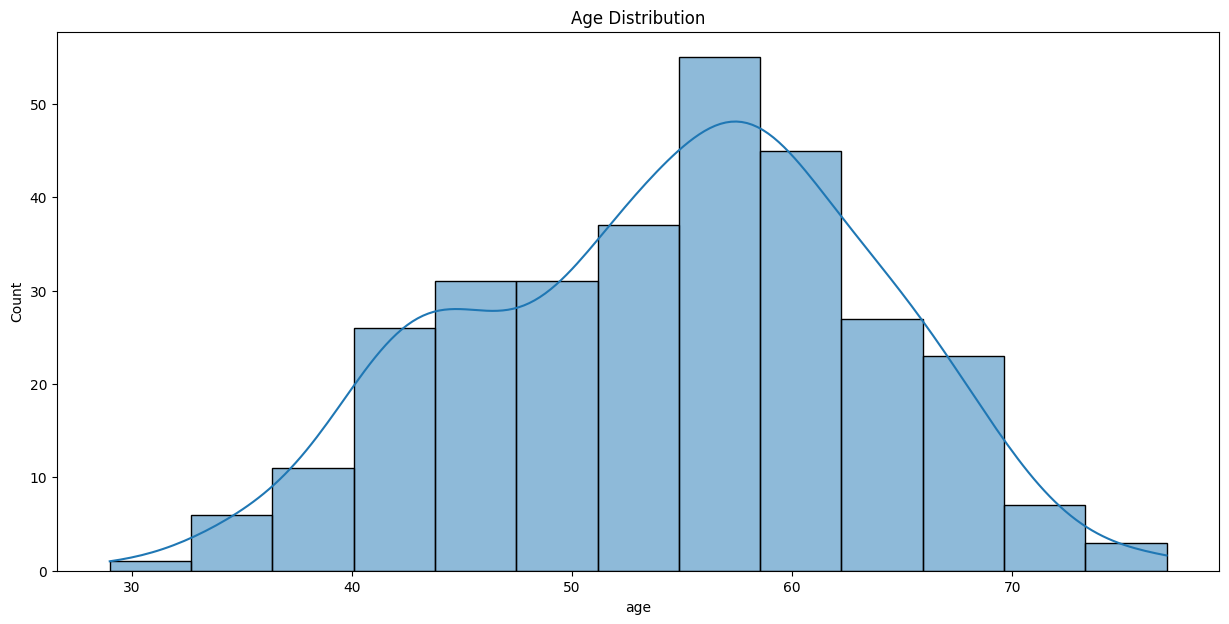

In [22]:
plt.figure(figsize=(15,7))

sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

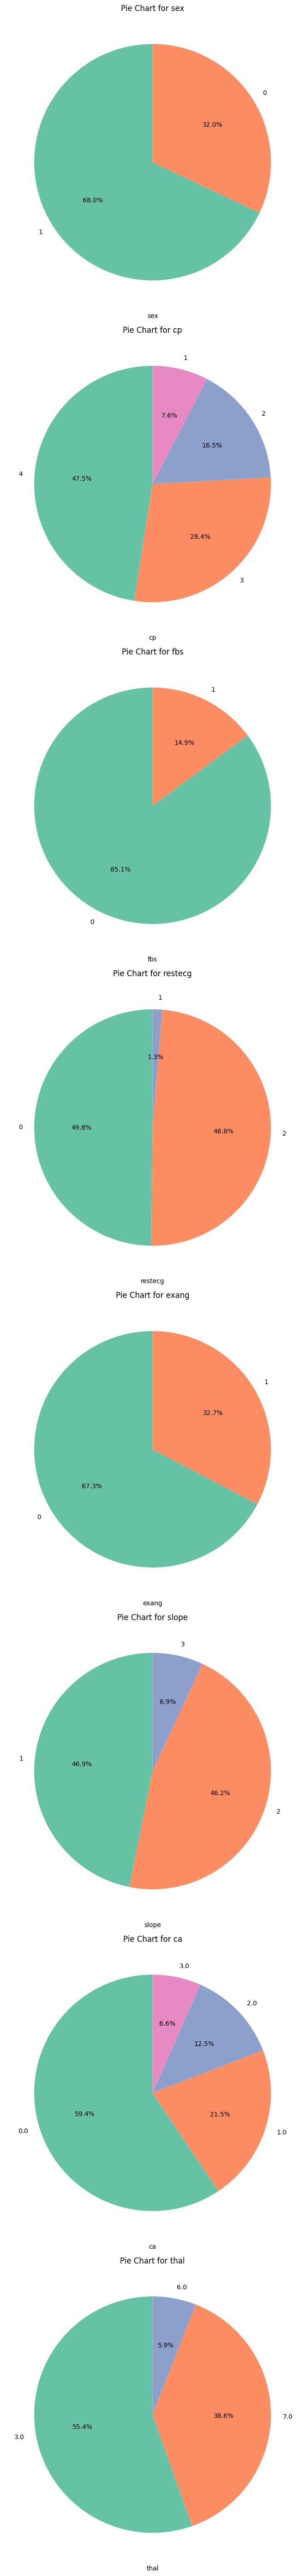

In [23]:
# List of columns to create pie charts
columns_to_plot = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Set up subplots
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(15,7 * len(columns_to_plot)))

# Create pie charts using matplotlib and seaborn
for i, column in enumerate(columns_to_plot):
    counts = df[column].value_counts()
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
    axes[i].set_title(f'Pie Chart for {column}')
    axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()


2) BIVARIATE ANALYSIS

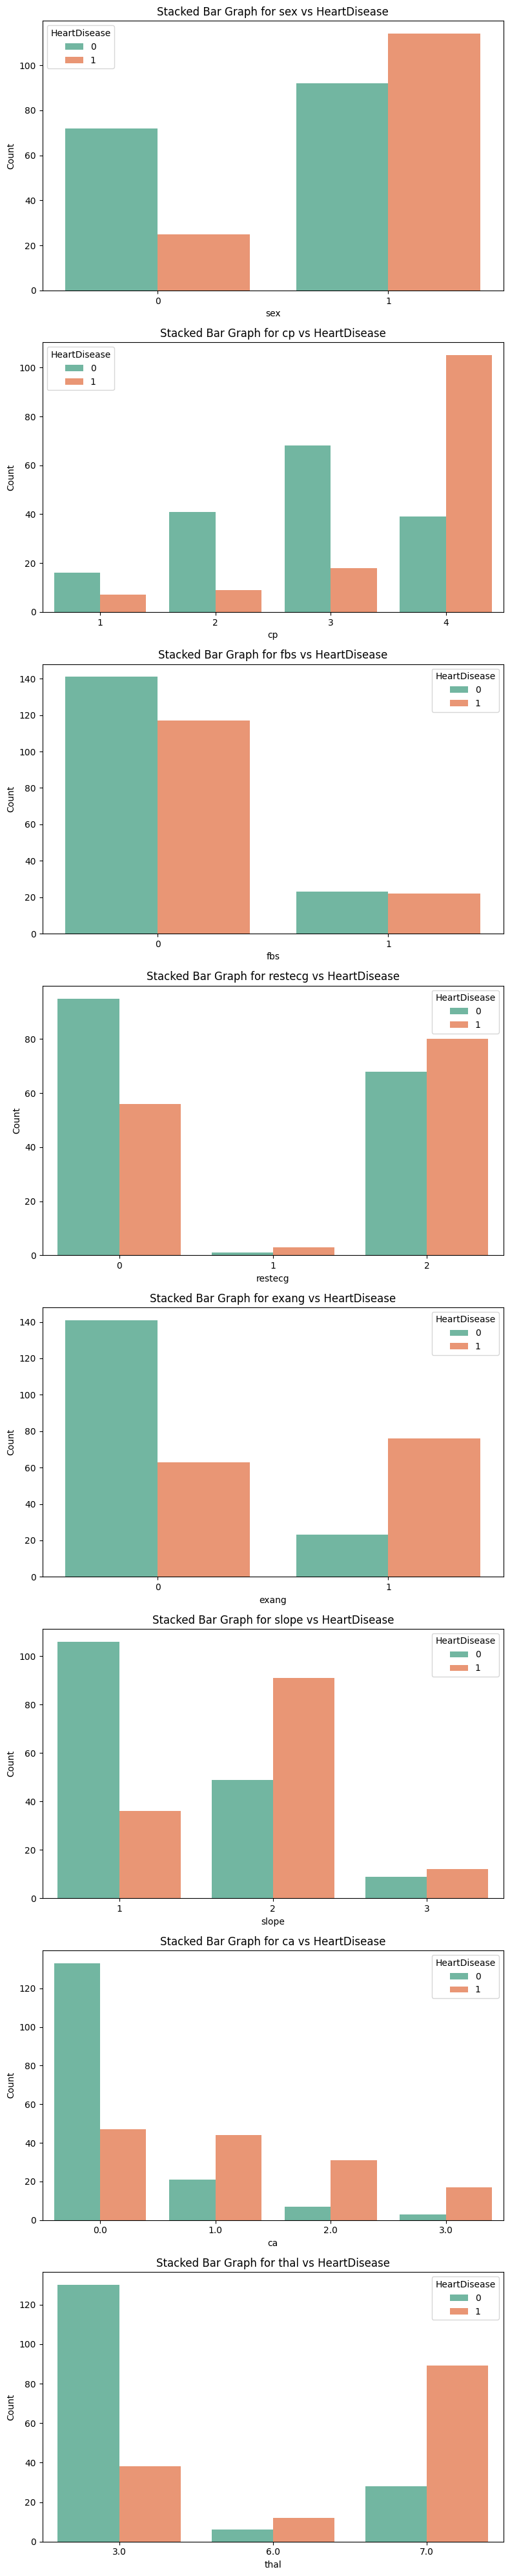

In [24]:
# List of columns to create stacked bar graphs
columns_to_plot = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Set up subplots
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(8, 5 * len(columns_to_plot)))

# Create stacked bar graphs using matplotlib and seaborn
for i, column in enumerate(columns_to_plot):
    sns.countplot(x=column, hue='HeartDisease', data=df, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Stacked Bar Graph for {column} vs HeartDisease')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

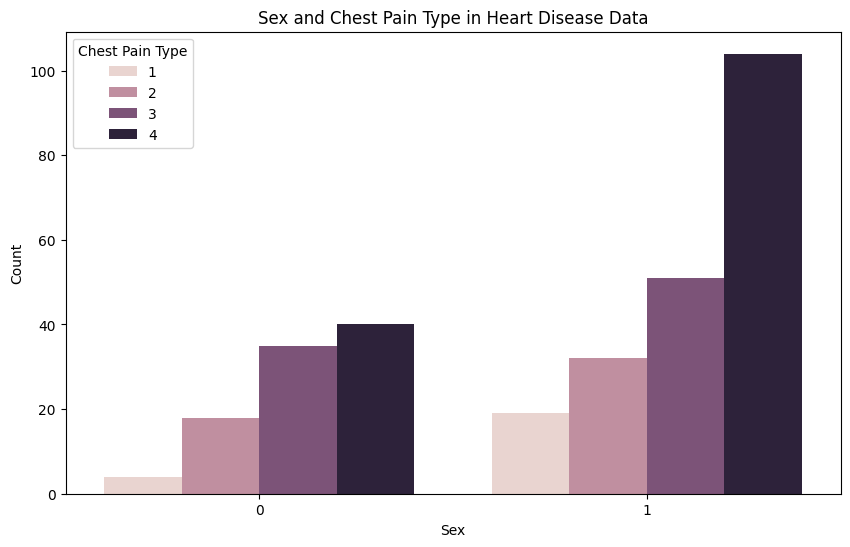

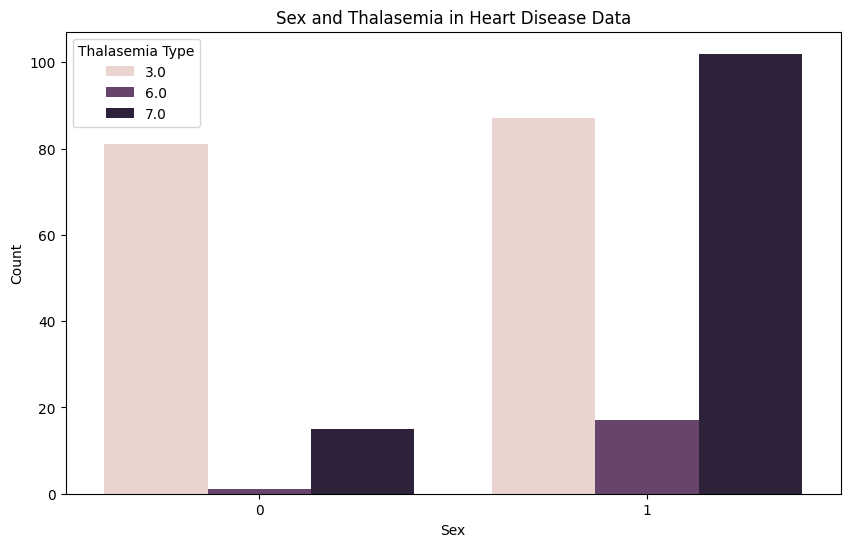

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='cp', data=df)

plt.title('Sex and Chest Pain Type in Heart Disease Data')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Chest Pain Type', loc='upper left')

plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='thal', data=df)

plt.title('Sex and Thalasemia in Heart Disease Data')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Thalasemia Type', loc='upper left')

plt.show()



3) MULTIVARIATE ANALYSIS

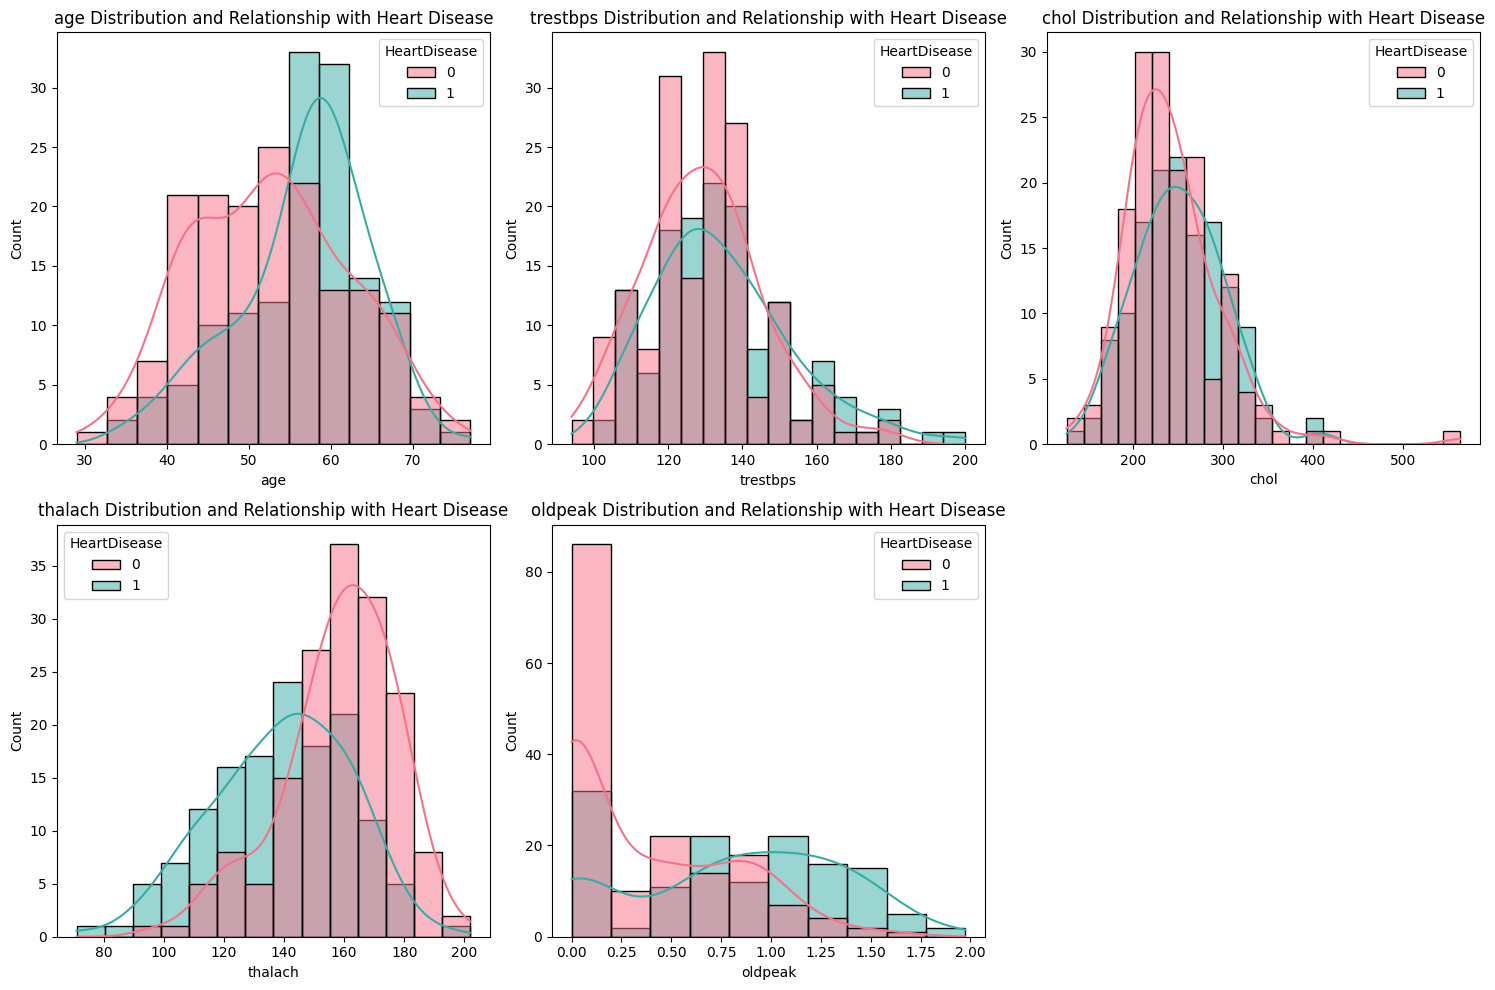

In [57]:
numeric_features = ['age', 'trestbps', 'chol', 'thalach','oldpeak']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i) 
    sns.histplot(data=df, x=feature, hue='HeartDisease', kde=True, palette='husl')
    plt.title(f'{feature} Distribution and Relationship with Heart Disease')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

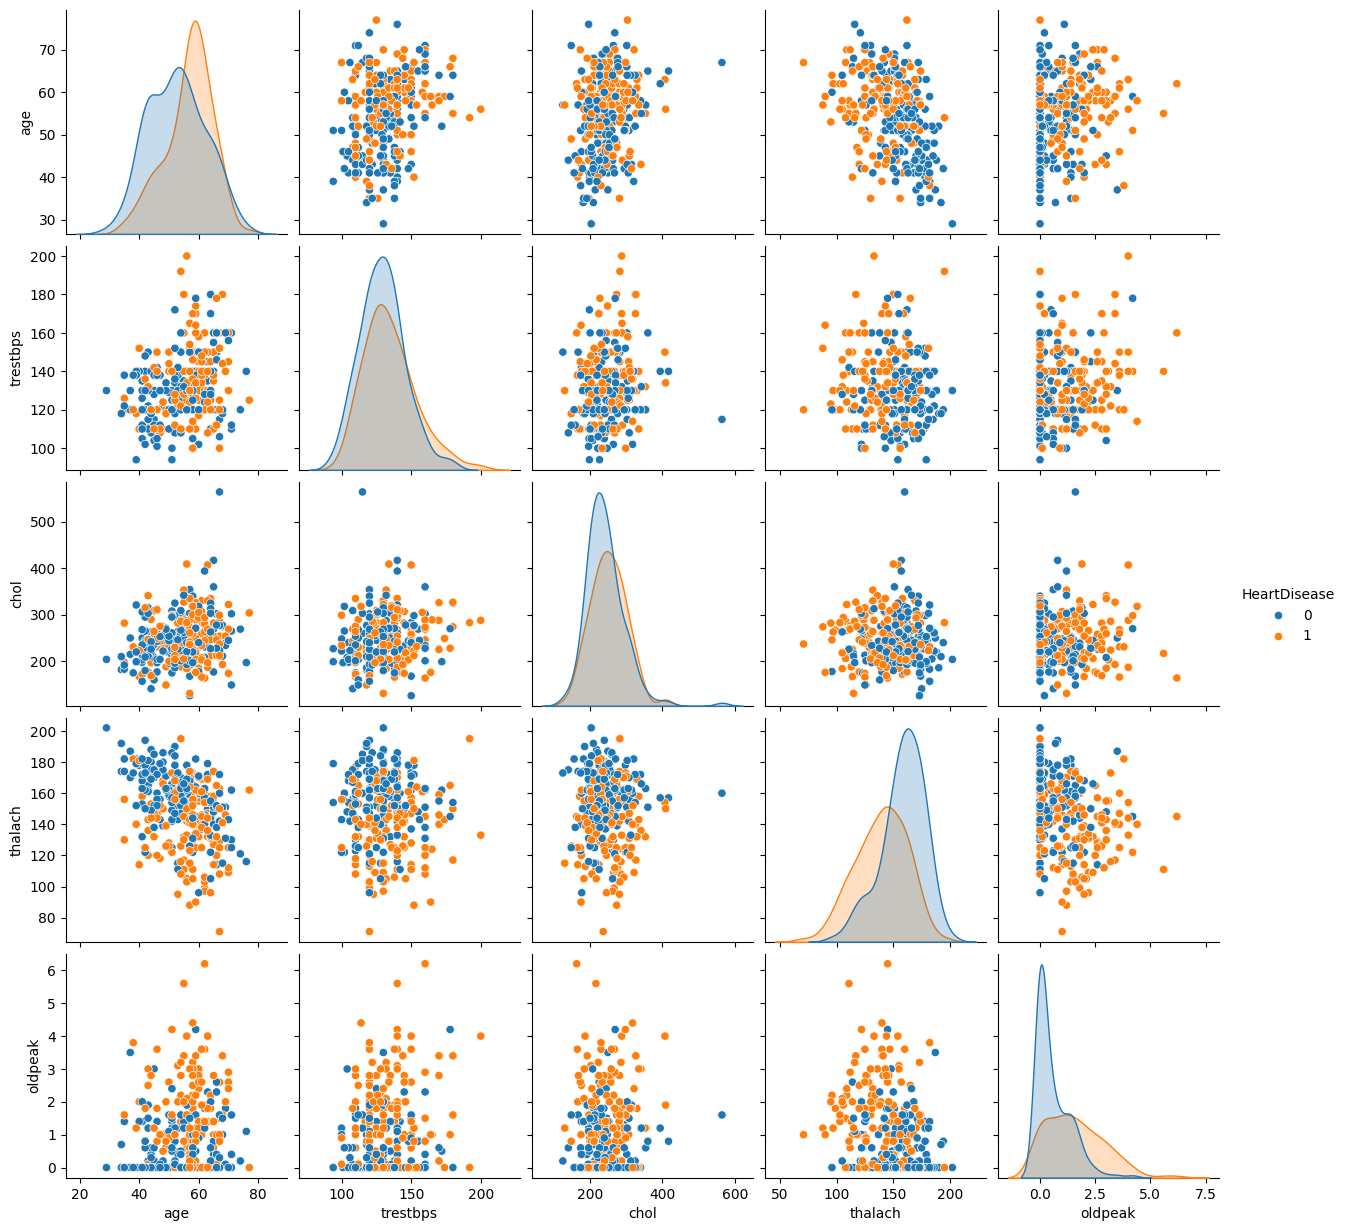

In [28]:
#create pairplot
plt.figure()
sns.pairplot(df[['age','trestbps','chol','thalach','oldpeak', 'HeartDisease']], hue='HeartDisease'
           #markers=['o','D'], plot_kws=dict(s=25, alpha=0.75, ci=None)
            )

plt.show()

LOG TRANSFORM ON OLD PEAK COLUMN AS IT IS AN RIGHT SKEWED

In [29]:
# Apply log transformation
df['oldpeak'] = np.log1p(df['oldpeak'])

# 'log1p' is used to avoid issues with log-transforming zero or negative values
print(df['oldpeak'])

0      1.193922
1      0.916291
2      1.280934
3      1.504077
4      0.875469
         ...   
298    0.788457
299    1.481605
300    0.788457
301    0.000000
302    0.000000
Name: oldpeak, Length: 303, dtype: float64


AFTER LOG TRANSFORM WE CHECKED THE SKEWENESS OF THAT COLUMN

In [30]:
df['oldpeak'].skew()

0.3968250668345526

SEPARATE THE INDEPENDENT AND DEPENDENT FEATURES.

In [31]:
X = df.drop(columns=['HeartDisease'],axis=1)
Y = df['HeartDisease']

In [32]:
print(X.shape , Y.shape)

(303, 13) (303,)


SPLITTING THE DATA INTO TRAIN SET AND TEST SET

In [33]:
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

APPLYING STANDARD SCALER

In [34]:
scaler = StandardScaler()


In [35]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [36]:
X_train_scaled


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-1.131852,0.670151,0.866659,-1.278857,-0.956978,-0.424839,1.033692,1.243174,-0.702728,-1.098319,-0.986675,0.328889,-0.967706
1,0.072862,0.670151,0.866659,1.576683,0.878810,-0.424839,1.033692,-0.194356,1.423025,0.007747,0.594619,0.328889,1.091062
2,-0.036657,0.670151,0.866659,-0.707749,-1.136566,-0.424839,-0.983675,-1.631886,-0.702728,0.549093,0.594619,0.328889,1.091062
3,0.510940,0.670151,0.866659,1.805126,-1.376016,2.353835,1.033692,-2.665111,-0.702728,0.206009,0.594619,1.362539,0.576370
4,0.401421,0.670151,-1.199661,-0.422195,-0.498031,-0.424839,-0.983675,-0.239279,-0.702728,-0.465163,0.594619,-0.704761,1.091062
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,0.401421,0.670151,0.866659,0.777132,-0.537939,-0.424839,-0.983675,-1.991269,-0.702728,0.968993,0.594619,0.328889,1.091062
238,-1.241372,0.670151,0.866659,-0.022420,0.040733,2.353835,1.033692,-0.284202,1.423025,-0.918970,0.594619,-0.704761,1.091062
239,-2.117527,-1.492202,0.866659,0.320245,-1.236337,-0.424839,-0.983675,1.467788,-0.702728,0.549093,-0.986675,-0.704761,-0.967706
240,-0.474735,0.670151,0.866659,1.005575,-0.039084,-0.424839,1.033692,-0.958044,-0.702728,1.312076,0.594619,-0.704761,1.091062


In [37]:
X_test_scaled


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-2.227047,-1.492202,-1.199661,-0.821971,-0.697573,-0.424839,-0.983675,1.917016,-0.702728,-0.099810,-0.986675,-0.704761,-0.967706
1,1.387096,-1.492202,-0.166501,-0.993303,6.366219,-0.424839,1.033692,0.479486,-0.702728,0.699713,0.594619,-0.704761,1.091062
2,-0.036657,0.670151,0.866659,-1.278857,-0.777390,-0.424839,1.033692,-1.856500,1.423025,-1.098319,0.594619,0.328889,-0.967706
3,1.058537,-1.492202,0.866659,2.718899,1.597162,-0.424839,-0.983675,0.209949,1.423025,-1.098319,-0.986675,-0.704761,-0.967706
4,-1.131852,0.670151,0.866659,-1.164636,0.898764,-0.424839,1.033692,0.165026,-0.702728,-1.098319,-0.986675,0.328889,-0.967706
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.291901,0.670151,0.866659,1.862237,0.878810,2.353835,1.033692,-1.137735,-0.702728,0.206009,0.594619,2.396189,1.091062
57,-1.788969,0.670151,-0.166501,0.320245,-1.395970,-0.424839,-0.983675,1.063483,-0.702728,-1.098319,-0.986675,-0.704761,-0.967706
58,0.401421,-1.492202,-0.166501,-0.707749,1.896475,-0.424839,-0.983675,1.018560,-0.702728,-1.098319,-0.986675,-0.704761,-0.967706
59,0.729979,0.670151,0.866659,-0.707749,0.300138,-0.424839,-0.983675,-0.418970,1.423025,1.773335,0.594619,0.328889,1.091062


LOGISTIC REGRESSION MODEL

In [38]:
model = LogisticRegression()
model.fit(X_train_scaled,y_train)

LogisticRegression()

In [39]:
# Acc. on training data
X_train_pred = model.predict(X_train_scaled)
train_pred = accuracy_score(X_train_pred, y_train)

print("Accuracy on training Data => ",train_pred)

# Acc. on Test Data
X_test_pred = model.predict(X_test_scaled)
test_pred = accuracy_score(X_test_pred, y_test)
print("Accuracy on test Data => ",test_pred)

Accuracy on training Data =>  0.8677685950413223
Accuracy on test Data =>  0.7868852459016393


In [40]:
# Classification report
print("Classification Report:\n", classification_report(y_test, X_test_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.89      0.83        35
           1       0.81      0.65      0.72        26

    accuracy                           0.79        61
   macro avg       0.79      0.77      0.78        61
weighted avg       0.79      0.79      0.78        61



HYPERPARAMETER TUNING ON LOGISTIC REGRESSION MODEL:

Best Hyperparameters: {'C': 0.1, 'penalty': 'l2'}
Accuracy on training Data =>  0.8636363636363636
Accuracy on test Data =>  0.819672131147541
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85        35
           1       0.86      0.69      0.77        26

    accuracy                           0.82        61
   macro avg       0.83      0.80      0.81        61
weighted avg       0.82      0.82      0.82        61



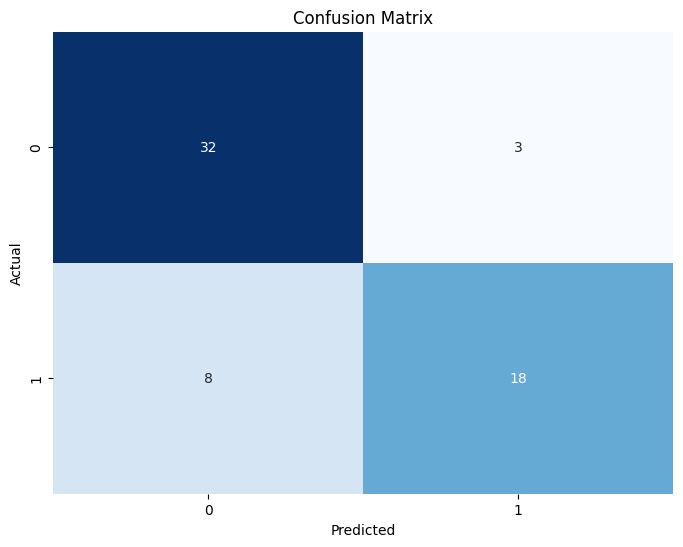

In [41]:
# Define the hyperparameters and their possible values
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
    #'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data with hyperparameter tuning
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Get the best model from the grid search
best_model_LR = grid_search.best_estimator_

# Evaluate the best model on the training data
train_pred_LR = best_model_LR.predict(X_train_scaled)
train_accuracy_LR = accuracy_score(train_pred_LR, y_train)
print("Accuracy on training Data => ", train_accuracy_LR)

# Evaluate the best model on the test data
test_pred_LR = best_model_LR.predict(X_test_scaled)
test_accuracy_LR = accuracy_score(test_pred_LR, y_test)
print("Accuracy on test Data => ", test_accuracy_LR)

# Classification report
print("Classification Report:\n", classification_report(y_test, test_pred_LR))

# Confusion Matrix
cm_LR = confusion_matrix(y_test, test_pred_LR)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_LR, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

SUPPORT VECTOR CLASSIFIER MODEL 

In [42]:
model2 = SVC()
model2.fit(X_train_scaled, y_train)

SVC()

In [43]:
# Acc. on training data
X_train_pred2 = model2.predict(X_train_scaled)
train_pred2 = accuracy_score(X_train_pred2, y_train)

print("Accuracy on training Data => ",train_pred2)

# Acc. on Test Data
X_test_pred2 = model2.predict(X_test_scaled)
test_pred2 = accuracy_score(X_test_pred2, y_test)
print("Accuracy on test Data => ",test_pred2)

Accuracy on training Data =>  0.9256198347107438
Accuracy on test Data =>  0.8032786885245902


In [44]:
# Classification report
print("Classification Report:\n", classification_report(y_test, X_test_pred2))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84        35
           1       0.85      0.65      0.74        26

    accuracy                           0.80        61
   macro avg       0.82      0.78      0.79        61
weighted avg       0.81      0.80      0.80        61



HYPERPARAMETER TUNING ON SVC MODEL:

Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy on training Data =>  0.9256198347107438
Accuracy on test Data =>  0.8032786885245902
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84        35
           1       0.85      0.65      0.74        26

    accuracy                           0.80        61
   macro avg       0.82      0.78      0.79        61
weighted avg       0.81      0.80      0.80        61



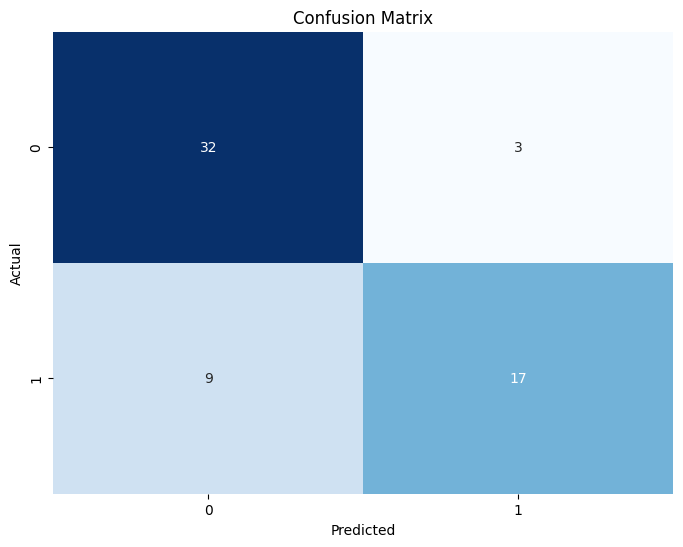

In [45]:
# Define the hyperparameters and their possible values
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
}

# Create a GridSearchCV object
grid_search_svc = GridSearchCV(model2, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data with hyperparameter tuning
grid_search_svc.fit(X_train_scaled, y_train)

# Get the best hyperparameters from the grid search
best_params_svc = grid_search_svc.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params_svc)

# Get the best model from the grid search
best_model_svc = grid_search_svc.best_estimator_

# Evaluate the best model on the training data
train_pred_svc = best_model_svc.predict(X_train_scaled)
train_accuracy_svc = accuracy_score(train_pred_svc, y_train)
print("Accuracy on training Data => ", train_accuracy_svc)

# Evaluate the best model on the test data
test_pred_svc = best_model_svc.predict(X_test_scaled)
test_accuracy_svc = accuracy_score(test_pred_svc, y_test)
print("Accuracy on test Data => ", test_accuracy_svc)

# Classification report
print("Classification Report:\n", classification_report(y_test, test_pred_svc))


# Confusion Matrix
cm_svc = confusion_matrix(y_test, test_pred_svc)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

RANDOM FOREST MODEL WITH HYPERPARAMETER TUNING

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy on training Data =>  0.9214876033057852
Accuracy on test Data =>  0.7868852459016393
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.89      0.83        35
           1       0.81      0.65      0.72        26

    accuracy                           0.79        61
   macro avg       0.79      0.77      0.78        61
weighted avg       0.79      0.79      0.78        61



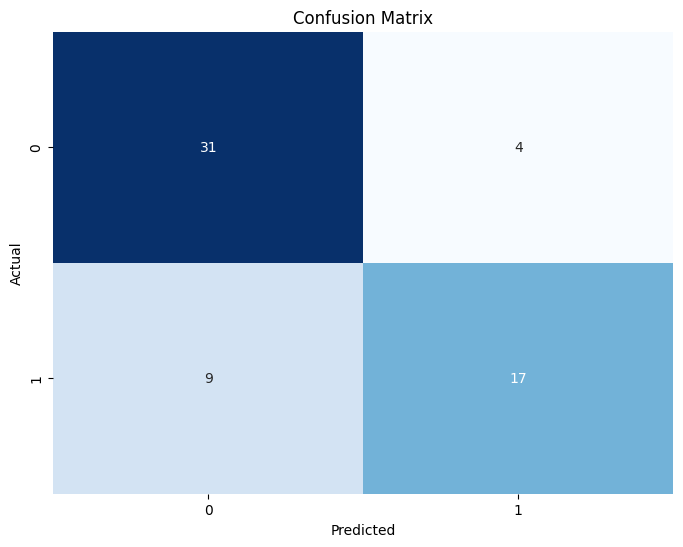

In [46]:
# Create a Random Forest model
rf_model = RandomForestClassifier()

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search_rf = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data with hyperparameter tuning
grid_search_rf.fit(X_train_scaled, y_train)

# Get the best hyperparameters from the grid search
best_params_rf = grid_search_rf.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params_rf)

# Get the best model from the grid search
best_model_rf = grid_search_rf.best_estimator_

# Evaluate the best model on the training data
train_pred_rf = best_model_rf.predict(X_train_scaled)
train_accuracy_rf = accuracy_score(train_pred_rf, y_train)
print("Accuracy on training Data => ", train_accuracy_rf)

# Evaluate the best model on the test data
test_pred_rf = best_model_rf.predict(X_test_scaled)
test_accuracy_rf = accuracy_score(test_pred_rf, y_test)
print("Accuracy on test Data => ", test_accuracy_rf)

# Classification report
print("Classification Report:\n", classification_report(y_test, test_pred_rf))


# Confusion Matrix
cm_rf = confusion_matrix(y_test, test_pred_rf)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [47]:
X_train_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-1.131852,0.670151,0.866659,-1.278857,-0.956978,-0.424839,1.033692,1.243174,-0.702728,-1.098319,-0.986675,0.328889,-0.967706
1,0.072862,0.670151,0.866659,1.576683,0.878810,-0.424839,1.033692,-0.194356,1.423025,0.007747,0.594619,0.328889,1.091062
2,-0.036657,0.670151,0.866659,-0.707749,-1.136566,-0.424839,-0.983675,-1.631886,-0.702728,0.549093,0.594619,0.328889,1.091062
3,0.510940,0.670151,0.866659,1.805126,-1.376016,2.353835,1.033692,-2.665111,-0.702728,0.206009,0.594619,1.362539,0.576370
4,0.401421,0.670151,-1.199661,-0.422195,-0.498031,-0.424839,-0.983675,-0.239279,-0.702728,-0.465163,0.594619,-0.704761,1.091062


In [48]:
# # Assuming you have new unseen data in a variable named 'new_data_scaled'
new_data_scaled = [['1.421462',	'0.692007',	'0.859781',	'-0.650217',	'-0.315885',	'-0.423999',	'0.985838',	'-0.920843',	'1.384437',	'1.322977',	'0.640781',	'1.666547',	'1.163033']]

# # Make predictions on the new unseen data
new_data_predictions = best_model_rf.predict(new_data_scaled)

# # Print or use the predictions as needed
print("Predictions on New Unseen Data:", new_data_predictions)


Predictions on New Unseen Data: [1]


COMPARISON OF ALL THE MODELS WE USED IN THIS PROJECT

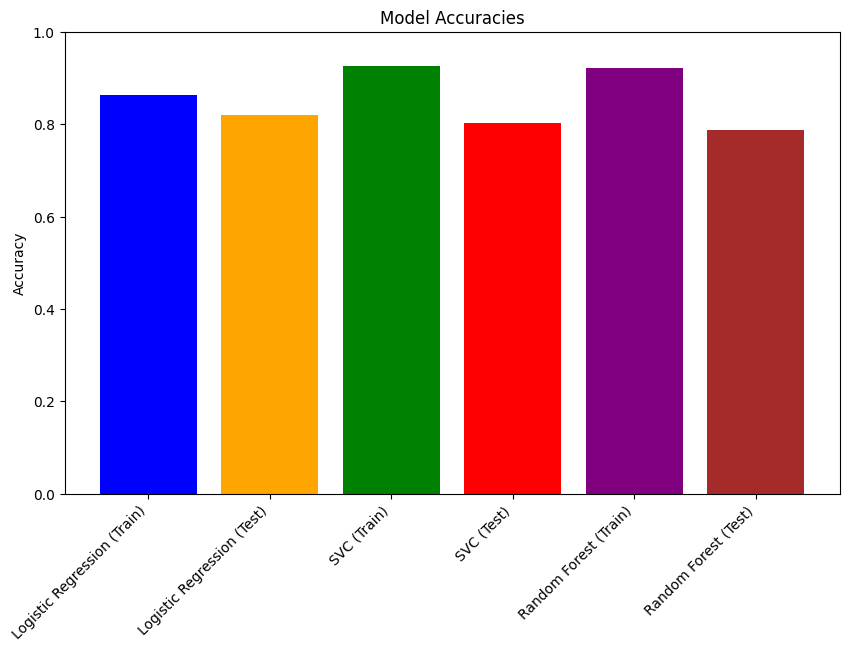

In [49]:
# Accuracy values for each model
accuracies = [train_accuracy_LR, test_accuracy_LR, train_accuracy_svc, test_accuracy_svc,
              train_accuracy_rf, test_accuracy_rf]

# Model names for the x-axis
models = ['Logistic Regression (Train)', 'Logistic Regression (Test)',
          'SVC (Train)', 'SVC (Test)',
          'Random Forest (Train)', 'Random Forest (Test)']

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.ylim([0, 1.0])  # Set y-axis limits between 0 and 1
plt.title('Model Accuracies')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

DUMPING THE BEST MODEL INTO THE  PKL FILE

In [50]:
# Dump the model into a pickle file
with open('LogisticRegression_model.pkl', 'wb') as f:
    pickle.dump(best_model_LR, f)

In [51]:
# Save the StandardScaler
scaler_filename = 'standard_scaler.pkl'
with open(scaler_filename, 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)